In [1]:
import os
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from scipy.spatial.distance import squareform
import pickle

In [11]:
ONT_fa = '/home/lijy/workspace/fasta/ONTbarcode.fa'
porcupine_fa = '/home/lijy/workspace/fasta/porcupine_sequences.fa'
seq96_fa = '/home/lijy/workspace/fasta/barcode96.fa'
seq384_fa = '/home/lijy/workspace/fasta/barcode384.fa'

# 读取距离数据

In [12]:
df = open('/home/lijy/workspace/sustag_plot/barcode_design_data/BHA_dist.P', 'rb')
BHA_DIST = pickle.load(df)
df.close()

In [13]:
square_bhdtw_dist_seq96 = squareform(BHA_DIST["seq96_bhdist"])
square_bhdtw_dist_seq384 = squareform(BHA_DIST["seq384_bhdist"])
square_bhdtw_dist_ONT = squareform(BHA_DIST["ONT_bhdist"])
square_bhdtw_dist_porcupine = squareform(BHA_DIST["porcupine_bhdist"])
print(BHA_DIST["seq96_bhdist"].shape, square_bhdtw_dist_seq96.shape)

(100, 100) (4950,)


In [14]:
df = open('/home/lijy/workspace/sustag_plot/barcode_design_data/BHA_dist_sustag96.P', 'rb')
BHA_DIST_96 = pickle.load(df)
df.close()
square_bhdtw_dist_seq96 = squareform(BHA_DIST["seq96_bhdist"])
print(BHA_DIST_96["seq96_bhdist"].shape)

(96, 96)


In [15]:
df = open('/home/lijy/workspace/sustag_plot/barcode_design_data/EUC_dist.P', 'rb')
EUC_DIST = pickle.load(df)
df.close()
square_eucdtw_dist_seq96 = squareform(EUC_DIST["seq96_eucdist"])
square_eucdtw_dist_seq384 = squareform(EUC_DIST["seq384_eucdist"])
square_eucdtw_dist_ONT = squareform(EUC_DIST["ONT_eucdist"])
square_eucdtw_dist_porcupine = squareform(EUC_DIST["porcupine_eucdist"])
print(EUC_DIST["seq96_eucdist"].shape, square_eucdtw_dist_seq96.shape)

(100, 100) (4950,)


In [16]:
df = open('/home/lijy/workspace/sustag_plot/barcode_design_data/EUC_dist_sustag96.P', 'rb')
EUC_DIST_96 = pickle.load(df)
df.close()
square_eucdtw_dist_seq96 = squareform(EUC_DIST_96["seq96_eucdist"])
print(EUC_DIST_96["seq96_eucdist"].shape)

(96, 96)


<Axes: ylabel='Count'>

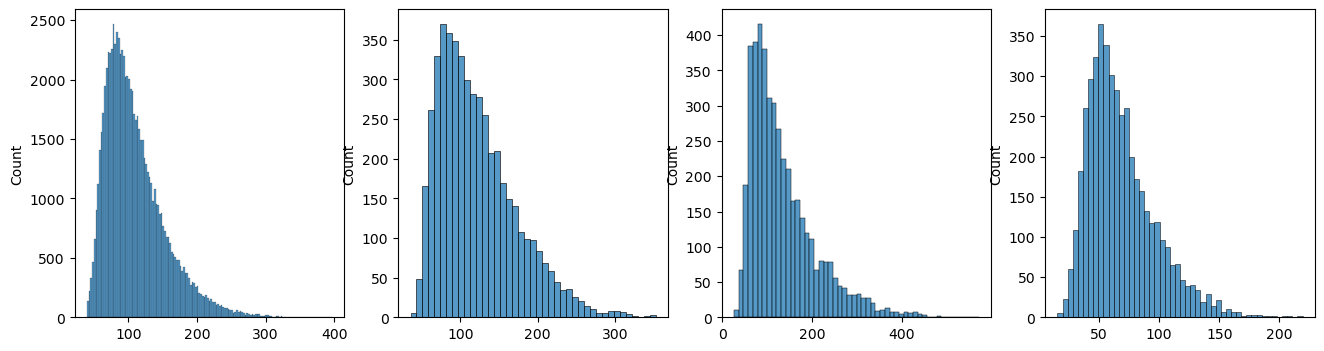

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))
sns.histplot(square_bhdtw_dist_seq384, ax=axes[0])
sns.histplot(square_bhdtw_dist_seq96, ax=axes[1])
sns.histplot(square_bhdtw_dist_porcupine, ax=axes[2])
sns.histplot(square_bhdtw_dist_ONT, ax=axes[3])

3.506392410770029 4.018898264687317 2.878730410454608 2.0248448473216403


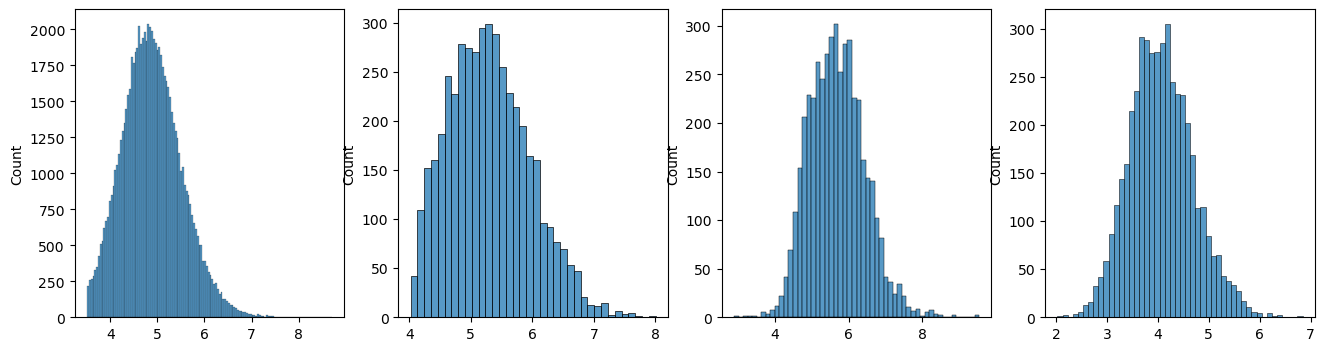

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))
sns.histplot(square_eucdtw_dist_seq384, ax=axes[0])
sns.histplot(square_eucdtw_dist_seq96, ax=axes[1])
sns.histplot(square_eucdtw_dist_porcupine, ax=axes[2])
sns.histplot(square_eucdtw_dist_ONT, ax=axes[3])

print(np.min(square_eucdtw_dist_seq384), np.min(square_eucdtw_dist_seq96), np.min(square_eucdtw_dist_porcupine), np.min(square_eucdtw_dist_ONT))

min_seq96_log10:  1.5467502344618795


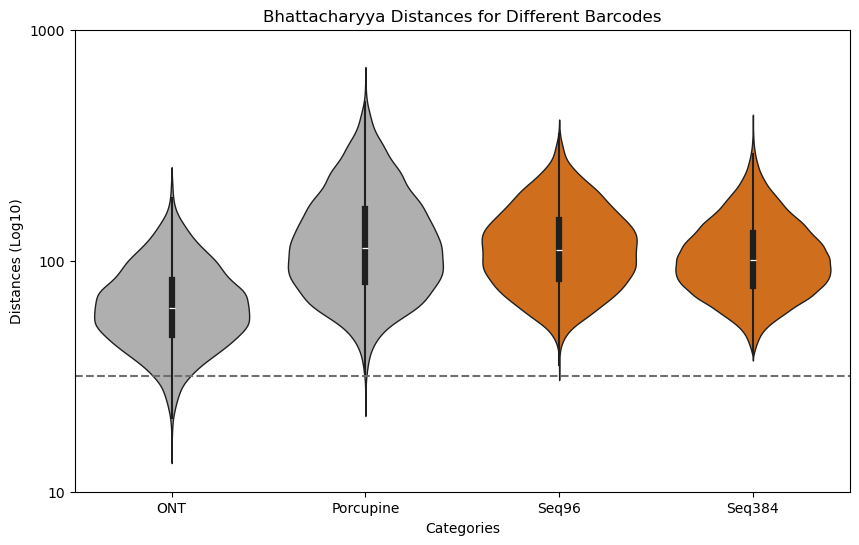

In [19]:
data = [square_bhdtw_dist_ONT, square_bhdtw_dist_porcupine, square_bhdtw_dist_seq96, square_bhdtw_dist_seq384]
labels = ['ONT', 'Porcupine', 'Seq96', 'Seq384']

colors = ['#afafaf', '#afafaf', '#ed6c00', '#ed6c00']

data_log10 = [np.log10(d) for d in data]
data_log2 = [np.log2(d) for d in data]

min_seq384_log10 = np.min(data_log10[1])
min_seq96_log10 = np.min(data_log10[2])

print("min_seq96_log10: ", min_seq96_log10)

plt.figure(figsize=(10, 6))
sns.violinplot(data=data_log10, fill=True, palette=colors, inner="box", linewidth=1, linecolor="#1f1f1f")
plt.xticks(ticks=range(len(labels)), labels=labels)
ticks = [10, 100, 1000]
tick_labels = [str(t) for t in ticks]
plt.yticks(ticks=np.log10(ticks), labels=tick_labels)
plt.xlabel('Categories')
plt.ylabel('Distances (Log10)')
plt.title('Bhattacharyya Distances for Different Barcodes')
plt.axhline(min_seq96_log10 - 0.045, color='#6f6f6f', linestyle='--', label='Min seq384 distance')
plt.ylim(1,3)
plt.savefig('./BHA_dist_ljy.svg', format='svg', dpi=300)
plt.show()

In [24]:
# data = [square_bhdtw_dist_ONT, square_bhdtw_dist_porcupine, square_bhdtw_dist_seq96, square_bhdtw_dist_seq384]
# labels = ['ONT', 'Porcupine', 'SUSTag96', 'SUSTag384']
data = [square_bhdtw_dist_ONT, square_bhdtw_dist_porcupine, square_bhdtw_dist_seq96]
labels = ['ONT', 'Porcupine', 'SUSTag96']

data_log10 = [np.log10(d) for d in data]

# sampling data
sample_size = 200
outliers_min = 3
outliers_max = 2

data_log10_sorted = [np.sort(data) for data in data_log10]


In [25]:
print(data_log10_sorted[2].shape)

(4950,)


1.1880750934036288
1.4092884066902531
1.5467502344618795


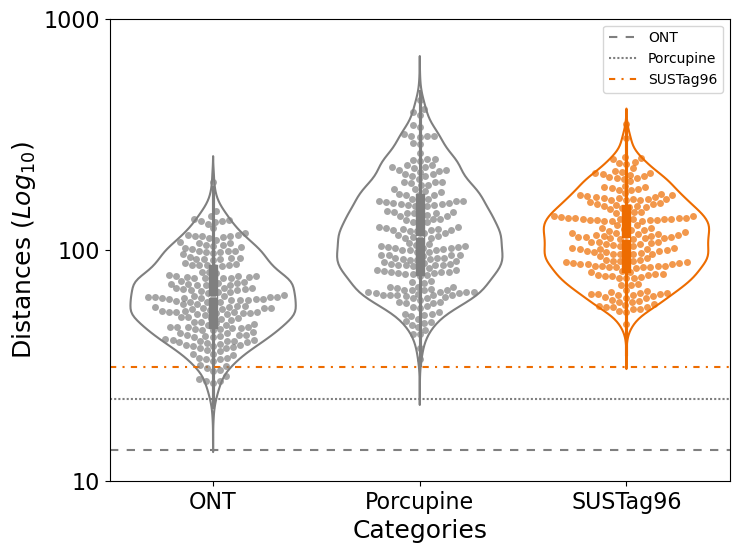

In [26]:
import matplotlib.font_manager as fm

np.random.seed(114514)
sampled_data_log10 = [np.random.choice(data, sample_size, replace=False) for data in data_log10]

sampled_data_log10_mod = []
for i in range(len(sampled_data_log10)):
    # sampled_data_log10_mod.append(np.hstack((sampled_data_log10[i], data_log10_sorted[i][:outliers_min], data_log10_sorted[i][-outliers_max:])))
    sampled_data_log10_mod.append(sampled_data_log10[i])


df_sampled_data_log10_mod = pd.DataFrame(
    {
        labels[0]: sampled_data_log10_mod[0],
        labels[1]: sampled_data_log10_mod[1],
        labels[2]: sampled_data_log10_mod[2],
        # labels[3]: sampled_data_log10_mod[3],
    }
)

colors = ['#7f7f7f', '#7f7f7f', '#ed6c00']
colors_scatter = ['#7f7f7f', '#7f7f7f', '#ed6c00']
linestyles = [(0, (4, 4)), (0, (1, 1)), (0, (3, 3, 1, 3))]

offset = 0.055

fig, ax = plt.subplots(figsize=(8, 6))
ax_violin = sns.violinplot(data=data_log10, fill=False, palette=colors, inner="box", linewidth=1.5)
plt.xticks(ticks=range(len(labels)), labels=labels)
ticks = np.array([1, 10, 100, 1000])

tick_labels = [str(t) for t in ticks]
plt.yticks(ticks=np.log10(ticks), labels=tick_labels)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('Categories', fontsize=18)
ax.set_ylabel('Distances ($Log_{10}$)', fontsize=18)

for idx, column in enumerate(df_sampled_data_log10_mod.columns):
    sns.swarmplot(
        x=idx,
        y=df_sampled_data_log10_mod[column],
        marker="o",
        s=5,
        linewidth=0,
        color=colors[idx],
        ax=ax_violin,
        alpha=0.7,
        
    )

for i in range(len(sampled_data_log10_mod)):
    print(np.min(data_log10[i]))
    plt.axhline(np.min(data_log10[i]) - offset, color=colors[i], linestyle=linestyles[i], label=f'{labels[i]}')
    # plt.annotate(f'{np.min(data_log10[i])}', xy=(-0.5, np.min(data_log10[i]) - 0.1), fontsize=11, color='#1f1f1f')

plt.ylim(1,3)
plt.legend()
plt.savefig('./BHA_dist_ljy_mod1.svg', format='svg', dpi=300)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


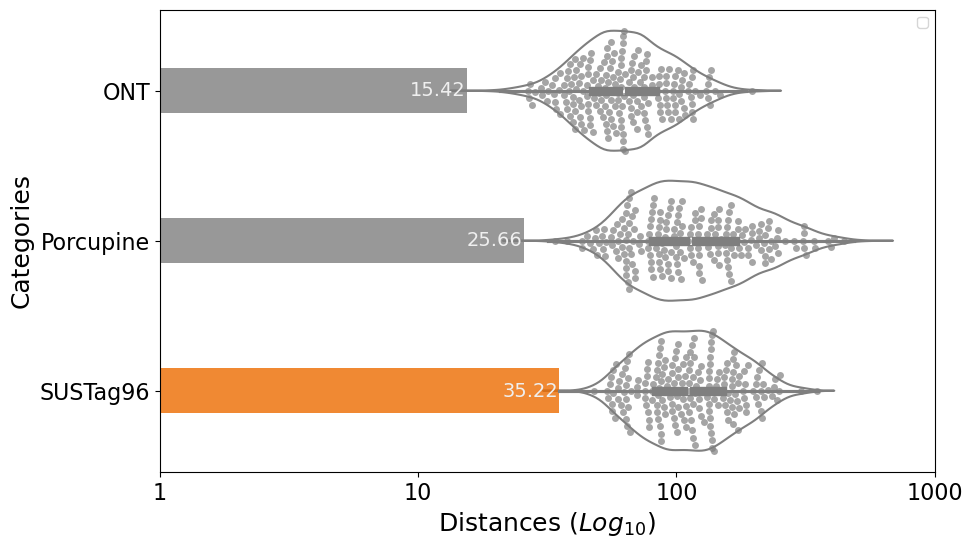

In [27]:
colors = ['#7f7f7f', '#7f7f7f', '#7f7f7f']
colors_scatter = ['#7f7f7f', '#7f7f7f', '#7f7f7f']
colors_bar = ['#7f7f7f', '#7f7f7f', '#ed6c00']
colors_text = ['#efefef', '#efefef', '#efefef']
linestyles = [(0, (4, 4)), (0, (1, 1)), (0, (3, 3, 1, 3))]

offset = 0.0

fig, ax = plt.subplots(figsize=(10, 6))
ax_violin = sns.violinplot(data=data_log10, fill=False, palette=colors, inner="box", linewidth=1.5, orient='h')
plt.yticks(ticks=range(len(labels)), labels=labels)
ticks = np.array([1, 10, 100, 1000])

tick_labels = [str(t) for t in ticks]
plt.xticks(ticks=np.log10(ticks), labels=tick_labels)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('Categories', fontsize=18)
ax.set_xlabel('Distances ($Log_{10}$)', fontsize=18)

for idx, column in enumerate(df_sampled_data_log10_mod.columns):
    sns.swarmplot(
        y=idx,
        x=df_sampled_data_log10_mod[column],
        marker="o",
        s=5,
        linewidth=0,
        color=colors_scatter[idx],
        ax=ax_violin,
        alpha=0.7,
        orient='h'
    )

# for i in range(len(sampled_data_log10_mod)):
#     plt.axvline(np.min(data_log10[i]) - offset, color=colors[i], linestyle=linestyles[i], label=f'{labels[i]}')

min_values = [np.min(data_log10[i]) - offset for i in range(len(sampled_data_log10_mod))]
ax.barh(range(len(sampled_data_log10_mod)), min_values, color=colors_bar, height=0.3, align='center', alpha=0.8)

for i, value in enumerate(min_values):
    ax.text(value-0.22, i, f'{math.pow(10, value):.2f}', va='center', ha='left', fontsize=14, color=colors_text[i])

plt.xlim(0, 3)
plt.legend()
plt.savefig('./BHA_dist_ljy_horizontal.svg', format='svg', dpi=300)
plt.show()

ONT 2.0248448473216403
Porcupine 2.878730410454608
SUSTag96 4.018898264687317


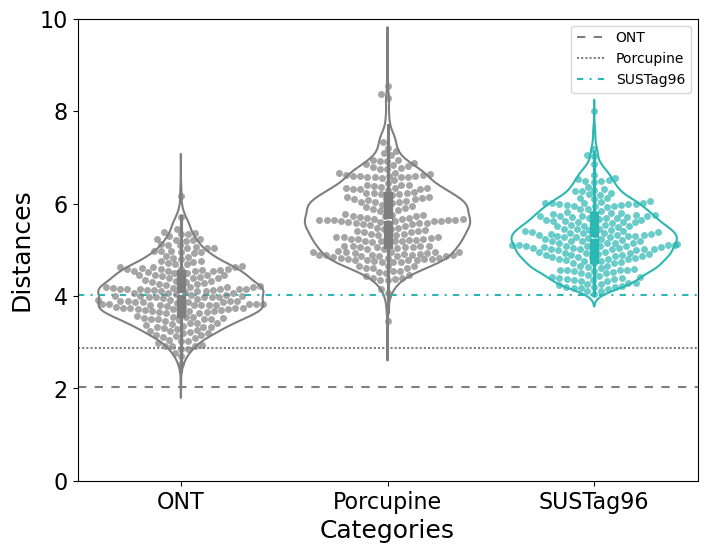

In [32]:
data = [square_eucdtw_dist_ONT, square_eucdtw_dist_porcupine, square_eucdtw_dist_seq96]
labels = ['ONT', 'Porcupine', 'SUSTag96']

# data_log10 = [np.log10(d) for d in data]

# sampling data
sample_size = 200
outliers_min = 3
outliers_max = 2

data_sorted = [np.sort(item) for item in data]

import matplotlib.font_manager as fm

np.random.seed(114514)
sampled_data = [np.random.choice(item, sample_size, replace=False) for item in data]

sampled_data_mod = []
for i in range(len(sampled_data)):
    # sampled_data_log10_mod.append(np.hstack((sampled_data_log10[i], data_log10_sorted[i][:outliers_min], data_log10_sorted[i][-outliers_max:])))
    sampled_data_mod.append(sampled_data[i])


df_sampled_data_mod = pd.DataFrame(
    {
        labels[0]: sampled_data_mod[0],
        labels[1]: sampled_data_mod[1],
        labels[2]: sampled_data_mod[2],
        # labels[3]: sampled_data_mod[3],
    }
)

# colors = ['#7f7f7f', '#7f7f7f', '#ed6c00', '#ed6c00']
colors = ['#7f7f7f', '#7f7f7f', '#2bb7b3']
colors_scatter = ['#7f7f7f', '#7f7f7f', '#2bb7b3']
linestyles = [(0, (4, 4)), (0, (1, 1)), (0, (3, 3, 1, 3))]
# linestyles = [(0, (5, 8)), (0, (5, 4)), (0, (3, 5, 1, 5)), (0, (3, 5, 1, 5, 1, 5))]
# linestyles = ['loosely dashed', 'dashed', 'dashdotted', 'dashdotdotted']

# 设置全局字体为 Arial
# plt.rcParams['font.family'] = 'Arial'
# 列出系统中可用的字体
# available_fonts = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# print(available_fonts)

offset = [0, 0, 0]

fig, ax = plt.subplots(figsize=(8, 6))
ax_violin = sns.violinplot(data=data, fill=False, palette=colors, inner="box", linewidth=1.5)
plt.xticks(ticks=range(len(labels)), labels=labels)
ticks = np.array([0, 2, 4, 6, 8, 10])
# for i in range(len(sampled_data_log10_mod)):
#     ticks = np.hstack((ticks, np.min(data_log10[i]) - offset))
# ticks = np.sort(ticks)
# print(ticks)
tick_labels = [str(t) for t in ticks]
plt.yticks(ticks=ticks, labels=tick_labels)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('Categories', fontsize=18)
ax.set_ylabel('Distances', fontsize=18)

for idx, column in enumerate(df_sampled_data_mod.columns):
    sns.swarmplot(
        x=idx,
        y=df_sampled_data_mod[column],
        marker="o",
        s=5,
        linewidth=0,
        color=colors[idx],
        ax=ax_violin,
        alpha=0.7,
        
    )

for i in range(len(sampled_data_mod)):
    plt.axhline(np.min(data[i]) - offset[i], color=colors[i], linestyle=linestyles[i], label=f'{labels[i]}')
    print(f'{labels[i]}', np.min(data[i]))
    # plt.annotate(f'{np.min(data_log10[i])}', xy=(-0.5, np.min(data_log10[i]) - 0.1), fontsize=11, color='#1f1f1f')

plt.ylim(0, 10)
plt.legend()
plt.savefig('./EUC_dist_ljy_mod1.svg', format='svg', dpi=300)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


3 200
ONT 2.0248448473216403
Porcupine 2.878730410454608
SUSTag96 4.018898264687317


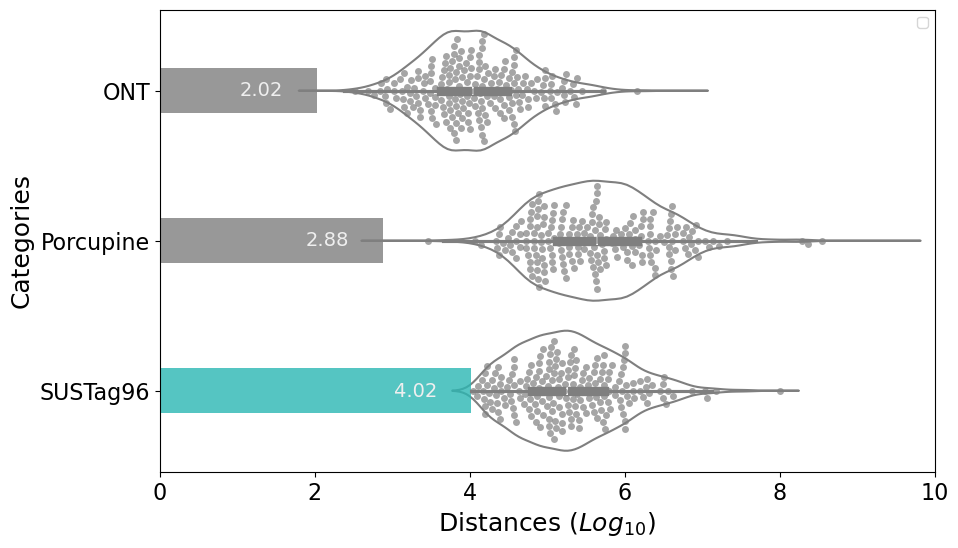

In [37]:
colors = ['#7f7f7f', '#7f7f7f', '#7f7f7f']
colors_scatter = ['#7f7f7f', '#7f7f7f', '#7f7f7f']
colors_bar = ['#7f7f7f', '#7f7f7f', '#2bb7b3']
colors_text = ['#efefef', '#efefef', '#efefef']
linestyles = [(0, (4, 4)), (0, (1, 1)), (0, (3, 3, 1, 3))]

# sampling data
sample_size = 200
outliers_min = 3
outliers_max = 2

np.random.seed(114514)
sampled_data = [np.random.choice(t, sample_size, replace=False) for t in data]

sampled_data_mod = []
for i in range(len(sampled_data)):
    sampled_data_mod.append(sampled_data[i])


df_sampled_data_mod = pd.DataFrame(
    {
        labels[0]: sampled_data_mod[0],
        labels[1]: sampled_data_mod[1],
        labels[2]: sampled_data_mod[2],
    }
)

offset = 0.0

fig, ax = plt.subplots(figsize=(10, 6))
ax_violin = sns.violinplot(data=data, fill=False, palette=colors, inner="box", linewidth=1.5, orient='h')
plt.yticks(ticks=range(len(labels)), labels=labels)

ticks = np.array([0, 2, 4, 6, 8, 10])
tick_labels = [str(t) for t in ticks]
plt.xticks(ticks=ticks, labels=tick_labels)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('Categories', fontsize=18)
ax.set_xlabel('Distances ($Log_{10}$)', fontsize=18)

for idx, column in enumerate(df_sampled_data_mod.columns):
    sns.swarmplot(
        y=idx,
        x=df_sampled_data_mod[column],
        marker="o",
        s=5,
        linewidth=0,
        color=colors_scatter[idx],
        ax=ax_violin,
        alpha=0.7,
        orient='h'
    )

# for i in range(len(sampled_data_log10_mod)):
#     plt.axvline(np.min(data_log10[i]) - offset, color=colors[i], linestyle=linestyles[i], label=f'{labels[i]}')
print(len(data), len(df_sampled_data_mod))
min_values = [np.min(data[i]) - offset for i in range(3)]
ax.barh(range(3), min_values, color=colors_bar, height=0.3, align='center', alpha=0.8)

for i, value in enumerate(min_values):
    print(f'{labels[i]}', np.min(data[i]))
    ax.text(value-1, i, f'{value:.2f}', va='center', ha='left', fontsize=14, color=colors_text[i])

plt.xlim(0, 10)
plt.legend()
plt.savefig('./EUC_dist_ljy_horizontal.svg', format='svg', dpi=300)
plt.show()

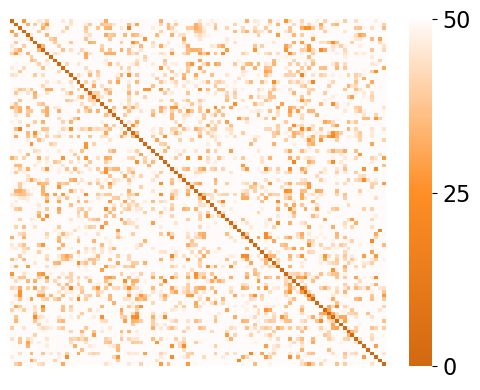

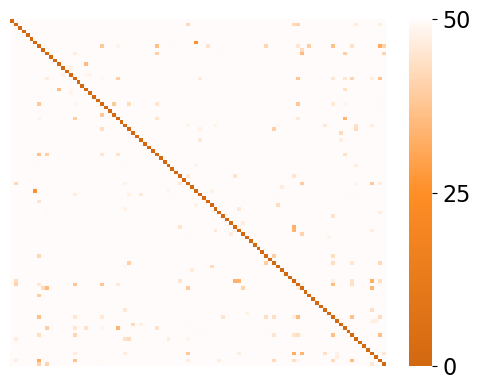

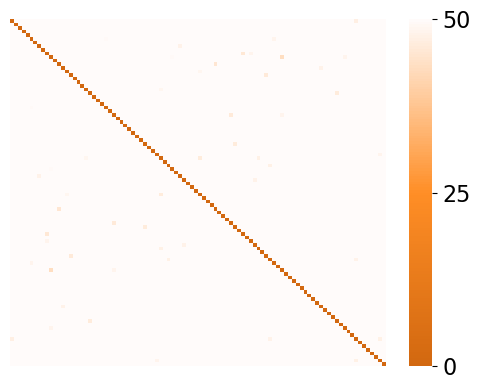

In [38]:
data = [BHA_DIST["ONT_bhdist"], BHA_DIST["porcupine_bhdist"], BHA_DIST_96["seq96_bhdist"]]
labels = ['ONT', 'Porcupine', 'SUSTag96']
# sns.color_palette("Oranges", 10)
# sns.color_palette("#ed6c00", 10)
cmaps = ['Oranges_r', 'Oranges_r', 'Oranges_r']
from matplotlib.colors import LinearSegmentedColormap

# 创建自定义的线性颜色变化
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ['#d26810', '#ff8e26', '#fffbfa'], N=128)

# 设置色条刻度和字体大小
cbar_ticks = [0, 25, 50]
fontsize = 16

for i, data_i in enumerate(data):
    fig, ax = plt.subplots(figsize=(5, 4))

    heatmap = sns.heatmap(data_i, ax=ax, cmap=custom_cmap, cbar=True, vmin=0, vmax=50,
                          cbar_kws={'ticks': cbar_ticks, 'format': '%.0f', 'shrink': 1, 'aspect': 15})
    
    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=fontsize)

    # ax.set_xticks(np.arange(0, data_i.shape[1], max(1, data_i.shape[1] // 10)))  # x轴每10%设置一个tick
    # ax.set_yticks(np.arange(0, data_i.shape[0], max(1, data_i.shape[0] // 10)))  # y轴每10%设置一个tick
    
    # 去除x轴和y轴的ticks
    ax.set_xticks([])
    ax.set_yticks([])

    
    plt.tight_layout()
    plt.savefig(f'./BHA_matrix_ljy_{labels[i]}.png', format='png', dpi=500)

plt.show()


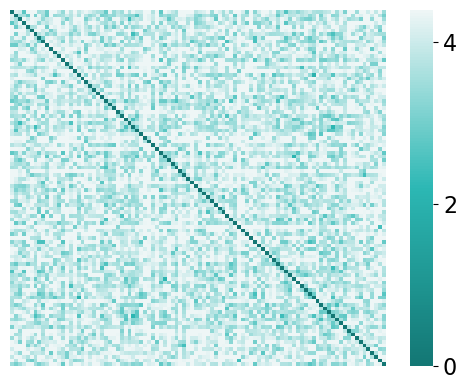

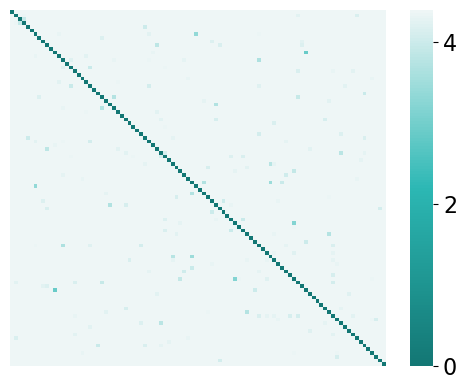

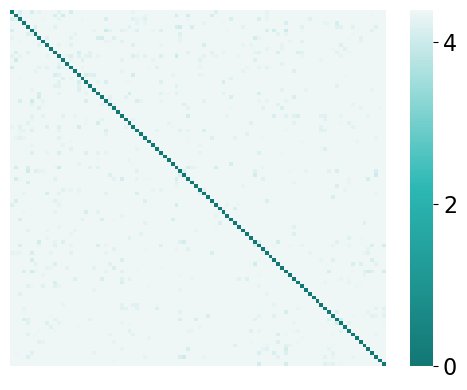

In [47]:
data = [EUC_DIST["ONT_eucdist"], EUC_DIST["porcupine_eucdist"], EUC_DIST_96["seq96_eucdist"]]
labels = ['ONT', 'Porcupine', 'SUSTag96']
# sns.color_palette("Oranges", 10)
# sns.color_palette("#ed6c00", 10)
cmaps = ['Oranges_r', 'Oranges_r', 'Oranges_r']
from matplotlib.colors import LinearSegmentedColormap

# 创建自定义的线性颜色变化
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ['#137774', '#2cb8b4', '#eef6f6'], N=128)

# 设置色条刻度和字体大小
cbar_ticks = [0, 2, 4]
fontsize = 16

for i, data_i in enumerate(data):
    fig, ax = plt.subplots(figsize=(5, 4))

    heatmap = sns.heatmap(data_i, ax=ax, cmap=custom_cmap, cbar=True, vmin=0, vmax=4.4,
                          cbar_kws={'ticks': cbar_ticks, 'format': '%.0f', 'shrink': 1, 'aspect': 15})
    
    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=fontsize)

    # ax.set_xticks(np.arange(0, data_i.shape[1], max(1, data_i.shape[1] // 10)))  # x轴每10%设置一个tick
    # ax.set_yticks(np.arange(0, data_i.shape[0], max(1, data_i.shape[0] // 10)))  # y轴每10%设置一个tick
    
    # 去除x轴和y轴的ticks
    ax.set_xticks([])
    ax.set_yticks([])

    
    plt.tight_layout()
    plt.savefig(f'./EUC_matrix_ljy_{labels[i]}.png', format='png', dpi=500)

plt.show()
